# Week 2 : Convolution with Padding, Strides, Conv on Multi Channel Images

### 1 : Create an image X that contains diagonal edges (i.e., a matrix where the values form a diagonal pattern). Now apply a kernel K(choose any) to this image. Answer the following sub-questions:

* What happens to the image X when the kernel K is applied? Explain the result.
* What happens if you transpose the image X before applying the kernel K? How does this affect the result?
* What happens if you transpose the kernel K and apply it to the original image X? What differences do you observe compared to applying the original kernel?

### Solution

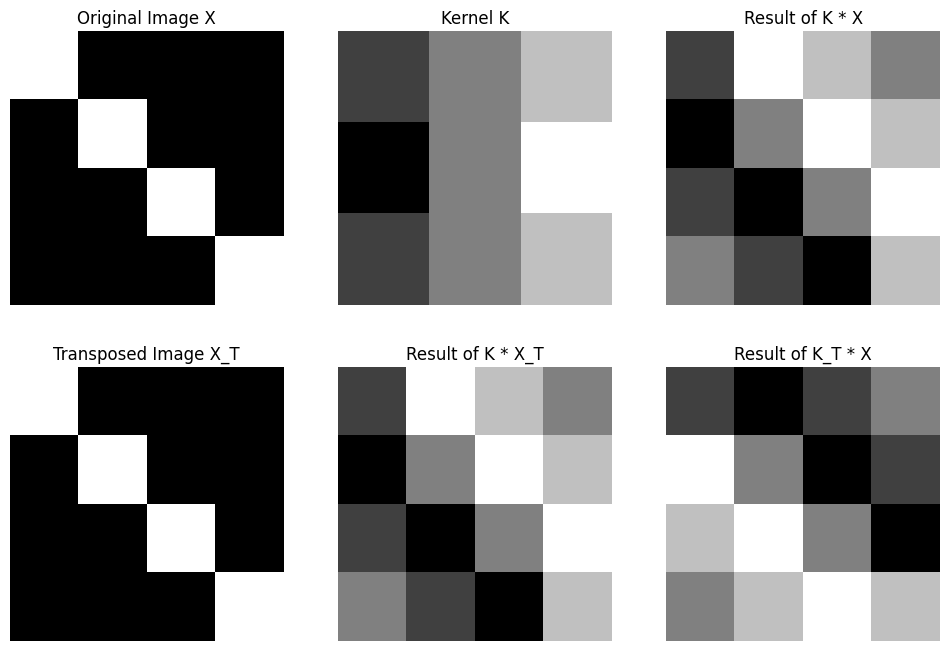

In [1]:
import numpy as np
import cv2
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# 1. Create an Image X with Diagonal Edges (4x4 matrix)
X = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# 2. Define the Sobel kernel K (horizontal edge detection)
K = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 3. Apply the kernel K to the Image X
result = convolve2d(X, K, mode='same', boundary='fill', fillvalue=0)

# 4. Transpose the Image X and apply kernel K
X_T = X.T
result_transposed_image = convolve2d(X_T, K, mode='same', boundary='fill', fillvalue=0)

# 5. Transpose the kernel K and apply it to the original Image X
K_T = K.T
result_transposed_kernel = convolve2d(X, K_T, mode='same', boundary='fill', fillvalue=0)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image X")
plt.imshow(X, cmap='gray', interpolation='none')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Kernel K")
plt.imshow(K, cmap='gray', interpolation='none')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Result of K * X")
plt.imshow(result, cmap='gray', interpolation='none')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Transposed Image X_T")
plt.imshow(X_T, cmap='gray', interpolation='none')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Result of K * X_T")
plt.imshow(result_transposed_image, cmap='gray', interpolation='none')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Result of K_T * X")
plt.imshow(result_transposed_kernel, cmap='gray', interpolation='none')
plt.axis('off')

plt.show()


### 2: Improve last week convolve function with padding and strides on 3D

Implement a function that performs a 3D convolution operation on an image with given padding and stride parameters. Your function should handle both zero-padding and valid (no padding) cases.

Also answer below:

* How does the output size change with different padding and stride values? Explain the relationship mathematically.

* Try implementing using Pytorch

### Solution

### 3. Implement Different padding

* Mirror
* Reflect
*


Improve above convolution code to apply mirror padding

Mirror padding: padding where the border values are simply mirrored to extend tensors.


Eg. -


Original :
```
[[1, 2, 5, 9, 6],
 [4, 7, 0, 1, 2],
 [3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4],
 [5, 6, 7, 0, 1]]
```


Mirror Padded with size 2:
```
[[5 4 3 4 5 6 7 6 5]
 [0 7 4 7 0 1 2 1 0]
 [5 2 1 2 5 9 6 9 5]
 [0 7 4 7 0 1 2 1 0]
 [5 4 3 4 5 6 7 6 5]
 [2 1 0 1 2 3 4 3 2]
 [7 6 5 6 7 0 1 0 7]
 [2 1 0 1 2 3 4 3 2]
 [5 4 3 4 5 6 7 6 5]]
 ```


Replicate Padded with size 2:
```
[[1 1 2 3 4 5 5]
 [1 1 2 3 4 5 5]
 [6 6 7 0 1 2 2]
 [3 3 4 5 6 7 7]
 [0 0 1 2 3 4 4]
 [5 5 6 7 0 1 1]
 [5 5 6 7 0 1 1]]
 ```







### Solution

###4. Downsample Image Using Convolve and Slicing

* **Convolution**:
    - Choose an appropriate kernel size and stride value that will downsample the image from size 𝑚 × n to 𝑚/2 × n/2.

* **Slicing**:

    - Downsample the image by concatenating alternate slices (i.e., take every second row and column to reduce the image size).


* Compare the visual quality and computational efficiency of the downsampled images.


## 5. Perform different Operations on 3-Channel images

* Color Filters : Red, Blue, Green
* Image Operations : Contrast, Brightness, Color Balacing


Note: Can use scikit-image to import images

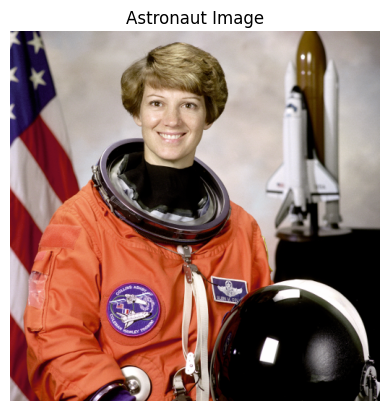

Image shape: (512, 512, 3)


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io

# Load a sample image from skimage's data module
image = data.astronaut()  # This is a 3-channel (RGB) image

# Display the image
plt.imshow(image)
plt.title('Astronaut Image')
plt.axis('off')  # Hide axis
plt.show()

# Check the shape of the image
print(f"Image shape: {image.shape}")  # Should be something like (512, 512, 3)


### Solution

## 6. Create a basic Convolutional Neural Network (CNN) architecture using Keras with TensorFlow. The network should have the following specifications:

1. **Layer Configuration**:
   - **1st Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.
   - **2nd Layer**: Convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation.
   - **3rd Layer**: Convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation.
   - **4th Layer**: Convolutional layer with 281 filters, a kernel size of 3x3, and ReLU activation.
   - **5th Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.

2. **Batch Normalization**:
   - Apply Batch Normalization after the 1st, 3rd, and 5th convolutional layers.

3. **Additional Requirements**:
   - Use padding='same' for all convolutional layers to maintain spatial dimensions.
   - Include a MaxPooling2D layer after each convolutional layer (except the last) to reduce spatial dimensions.
   - Add a Flatten layer followed by a Dense layer with 10 units and a softmax activation for classification.

Provide the complete code for building this CNN architecture in Keras with TensorFlow.


### Solution